In [17]:
# Import packages
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
# Print many statements at same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [20]:
wine=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",header=None)

In [21]:
wine.columns=['Class_label','Alcohol','Malic_acid','Ash','Alcalinity_of_ash',
              'Magnesium','Total_phenols','Flavanoids','Nonflavanoids_phenols',
              'Proanthocyanins','Color_intensity','Hue','OD280/OD315_of_diluted_wines','Proline']

In [22]:
#Data Exploration
wine.head()
wine.shape
wine.info()
wine.Class_label.nunique()
wine.groupby('Class_label').size()
wine.columns
means=np.round(pd.pivot_table(wine,values=['Alcohol','Malic_acid','Ash','Alcalinity_of_ash',
              'Magnesium','Total_phenols','Flavanoids','Nonflavanoids_phenols',
              'Proanthocyanins','Color_intensity','Hue',
            'OD280/OD315_of_diluted_wines','Proline'],index='Class_label',aggfunc=np.mean),2)
means

,Class_label,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoids_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


(178, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class_label                     178 non-null int64
Alcohol                         178 non-null float64
Malic_acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity_of_ash               178 non-null float64
Magnesium                       178 non-null int64
Total_phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoids_phenols           178 non-null float64
Proanthocyanins                 178 non-null float64
Color_intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315_of_diluted_wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


3

Class_label
1    59
2    71
3    48
dtype: int64

Index(['Class_label', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoids_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280/OD315_of_diluted_wines', 'Proline'],
      dtype='object')

,Alcalinity_of_ash,Alcohol,Ash,Color_intensity,Flavanoids,Hue,Magnesium,Malic_acid,Nonflavanoids_phenols,OD280/OD315_of_diluted_wines,Proanthocyanins,Proline,Total_phenols
Class_label,,,,,,,,,,,,,
1,17.04,13.74,2.46,5.53,2.98,1.06,106.34,2.01,0.29,3.16,1.90,1115.71,2.84
2,20.24,12.28,2.24,3.09,2.08,1.06,94.55,1.93,0.36,2.79,1.63,519.51,2.26
3,21.42,13.15,2.44,7.40,0.78,0.68,99.31,3.33,0.45,1.68,1.15,629.90,1.68


In [23]:
#Create Feature and labels
x=wine.drop('Class_label',axis=1)
y=wine['Class_label']
x.head()
y.head()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoids_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


0    1
1    1
2    1
3    1
4    1
Name: Class_label, dtype: int64

In [24]:
#Standardize the data
from sklearn.preprocessing import scale
x_scaled=scale(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled.head()
x_scaled.describe()

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoids_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoids_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [25]:
#Fit PCA model.The number of components will be same as number of variables
from sklearn.decomposition import PCA
pca=PCA().fit(x_scaled)

In [26]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [27]:
str(pca.explained_variance_ratio_) #first component explains 36.2% variance, second 19.2% and so on

'[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823\n 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233\n 0.00795215]'

In [28]:
str(pca.explained_variance_ratio_.sum())

'1.0'

In [29]:
pca=PCA(5).fit(x_scaled)

In [30]:
str(pca.explained_variance_ratio_.sum())

'0.8016229275554787'

In [31]:
pca=PCA(4).fit(x_scaled)

In [32]:
str(pca.explained_variance_ratio_.sum())

'0.7359899907589927'

In [33]:
#Kaiser Criteria(Eigen Values)
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587])

In [34]:
#Create dataframe of components
pca_df=pd.DataFrame(pca.components_,columns=x.columns)
pca_df

,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoids_phenols,Proanthocyanins,Color_intensity,Hue,OD280/OD315_of_diluted_wines,Proline
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
3,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071


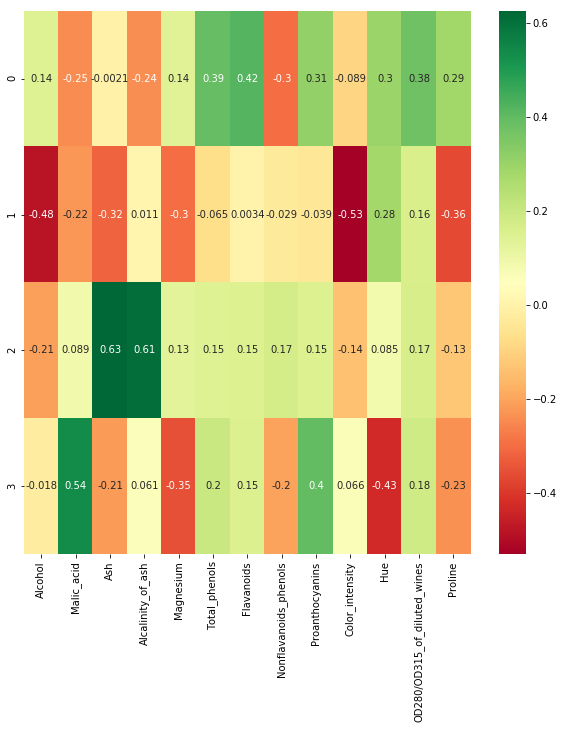

In [35]:
#Heatmap of components
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(pca_df,cmap='RdYlGn',annot=True)
plt.show();

In [36]:
# Original features
x_scaled.shape

(178, 13)

In [37]:
x_scaled_trnsf=pca.fit_transform(x_scaled)

In [38]:
#Transformed features.Instead of having 13, we have 4 now.This can now plugged into any futher modeling work.
x_scaled_trnsf=pd.DataFrame(x_scaled_trnsf,columns=('P1','P2','P3','P4'))
x_scaled_trnsf.head()
x_scaled_trnsf.shape

,P1,P2,P3,P4
0,3.316751,-1.443463,-0.165739,-0.215631
1,2.209465,0.333393,-2.026457,-0.291358
2,2.516740,-1.031151,0.982819,0.724902
3,3.757066,-2.756372,-0.176192,0.567983
4,1.008908,-0.869831,2.026688,-0.409766


(178, 4)